In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.drop(['id', 'feature3'], axis=1, inplace=True)

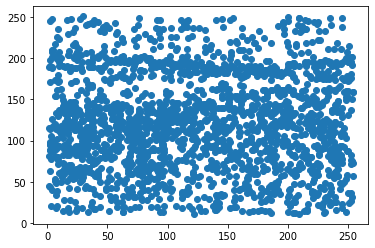

In [4]:
plt.scatter(df['feature1'], df['feature2'])
plt.show()

In [5]:
cols = df.columns

In [6]:
X = df.iloc[:].values

In [7]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [8]:
X

array([[3.35968379e-01, 5.37500000e-01, 0.00000000e+00, ...,
        1.00147274e-01, 6.27944000e-01, 1.05152480e-01],
       [1.30434783e-01, 3.41666667e-01, 0.00000000e+00, ...,
        1.55375555e-01, 5.59178770e-01, 1.58053139e-01],
       [5.25691700e-01, 5.70833333e-01, 0.00000000e+00, ...,
        7.36377012e-04, 1.11111110e-01, 1.59448519e-01],
       ...,
       [9.40711462e-01, 4.12500000e-01, 0.00000000e+00, ...,
        1.05301915e-01, 6.20642700e-01, 1.55105428e-01],
       [3.95256917e-03, 3.54166667e-01, 0.00000000e+00, ...,
        6.48011792e-02, 8.24783860e-01, 1.19779061e-01],
       [1.73913043e-01, 4.16666667e-01, 0.00000000e+00, ...,
        1.57584690e-01, 4.89896600e-01, 1.58395009e-01]])

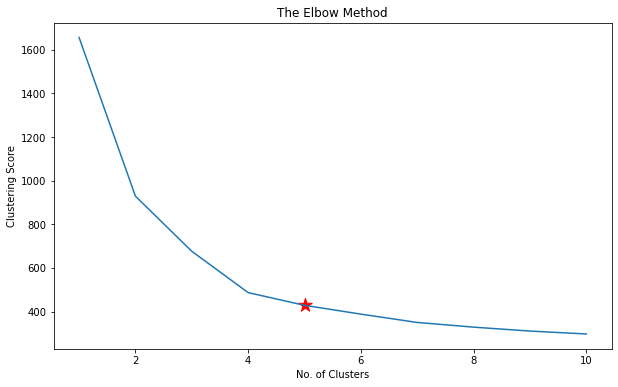

In [9]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [10]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([4, 4, 3, ..., 3, 4, 4])

In [11]:
df['Cluster'] = pred

In [12]:
X

array([[3.35968379e-01, 5.37500000e-01, 0.00000000e+00, ...,
        1.00147274e-01, 6.27944000e-01, 1.05152480e-01],
       [1.30434783e-01, 3.41666667e-01, 0.00000000e+00, ...,
        1.55375555e-01, 5.59178770e-01, 1.58053139e-01],
       [5.25691700e-01, 5.70833333e-01, 0.00000000e+00, ...,
        7.36377012e-04, 1.11111110e-01, 1.59448519e-01],
       ...,
       [9.40711462e-01, 4.12500000e-01, 0.00000000e+00, ...,
        1.05301915e-01, 6.20642700e-01, 1.55105428e-01],
       [3.95256917e-03, 3.54166667e-01, 0.00000000e+00, ...,
        6.48011792e-02, 8.24783860e-01, 1.19779061e-01],
       [1.73913043e-01, 4.16666667e-01, 0.00000000e+00, ...,
        1.57584690e-01, 4.89896600e-01, 1.58395009e-01]])

Text(0.5, 1.0, 'Customer Clusters')

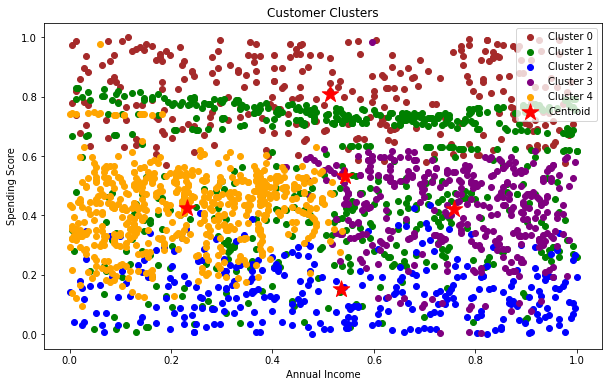

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [14]:
test = pd.read_csv('../data/test.csv')
submit = pd.read_csv('../data/submit.csv')
test

,index,0,1
0,0,1303,1234
1,1,1710,878
2,2,1587,1637
3,3,892,119
4,4,83,940
...,...,...,...
395,395,1494,1778
396,396,1240,1672
397,397,988,2012
398,398,1680,481


In [18]:
for i in range(len(test)):
    selectA = test.loc[i]['0']
    selectB = test.loc[i]['1']
    if df.loc[selectA]['Cluster'] == df.loc[selectB]['Cluster']:
        submit.loc[i,'ans'] = int(round(1))
    else:
        submit.loc[i,'ans'] = int(round(0))

In [19]:
submit.ans = submit.ans.astype(int)

In [20]:
submit.to_csv('sub3.csv',index=False)